Katsayılar: 
 [938.23786125]
Ortalama Kare Hata: 2548.07
Belirleme Katsayısı: 0.47


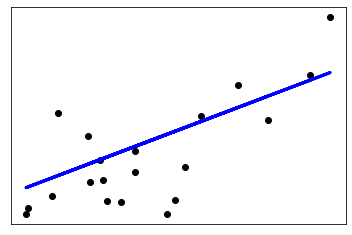

In [3]:
# Kaynak Kod: Jaques Grobler'un kodundan uyarlanmıştır
# Lisans: BSD 3 hükümleri geçerlidir

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Diyabet veri setini yükleyelim
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Sadece bir özniteliği kullanalım
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Veriyi eğitim ve test şeklinde ayrıştıralım
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Çıktı değerlerini de eğitim ve test şeklinde ayrıştıralım
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Doğrusal regresyon nesnesi oluşturalım
regr = linear_model.LinearRegression()

# Eğitim verisi ile modeli eğitelim
regr.fit(diabetes_X_train, diabetes_y_train)

# Test verisini kullanarak kestirim işlemini gerçekleştirelim
diabetes_y_pred = regr.predict(diabetes_X_test)

# Katsayıları hesaplayalım
print("Katsayılar: \n", regr.coef_)
# Ortalama Kare Hata'yı hesaplayalım
print("Ortalama Kare Hata: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Belirleme Katsayısı'nı hesaplayalım: Mükemmel kestirim için 1 değeri alır 
print("Belirleme Katsayısı: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Çıktıları çizdirelim
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

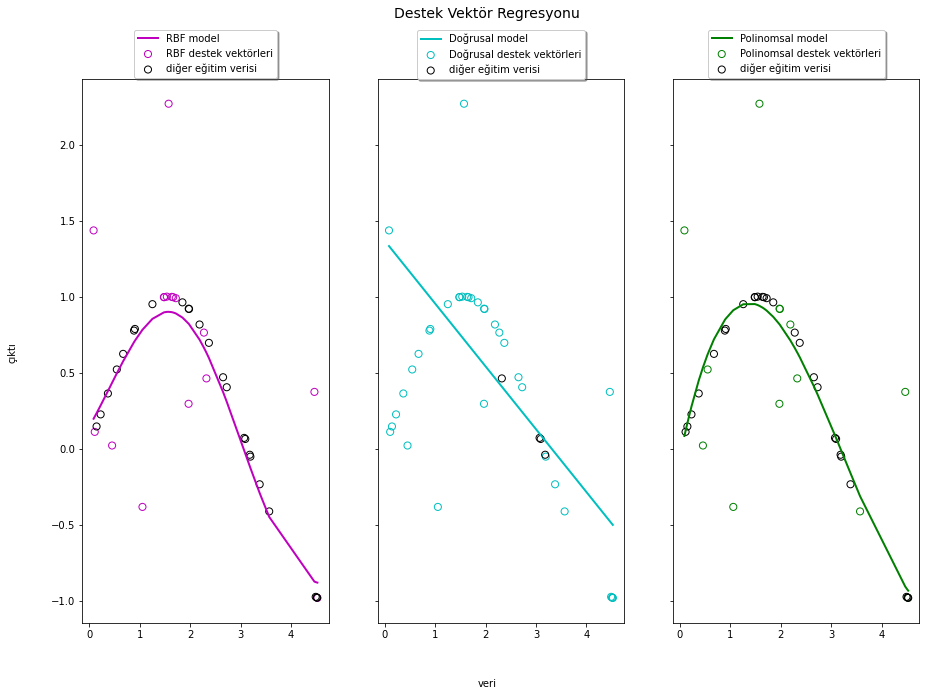

In [6]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Örnek veri oluşturalım
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Çıktı değerlere gürültü ekleyelim
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Regresyon modellerini eğitelim
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Sonuçları inceleyelim
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Doğrusal", "Polinomsal"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} destek vektörleri".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="diğer eğitim verisi",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "veri", ha="center", va="center")
fig.text(0.06, 0.5, "çıktı", ha="center", va="center", rotation="vertical")
fig.suptitle("Destek Vektör Regresyonu", fontsize=14)
plt.show()